<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/content/experience-fragments/uoc-common/ww/ca/site/header/master/_jcr_content/root/container/uocheader/image.coreimg.png/1707386740074/logo.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.883 · Aprendizaje por refuerzo</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>




# PRA1: Implementación de un agente para la robótica espacial

## 0. Código adicional

Instalación de paquetes para Google Colab.

In [70]:
!pip install pygame
!sudo apt-get install swig build-essential python-dev python3-dev
!pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'python-dev-is-python2' instead of 'python-dev'
python3-dev is already the newest version (3.8.2-0ubuntu2).
python-dev-is-python2 is already the newest version (2.7.17-4).
swig is already the newest version (4.0.1-5build1).
build-essential is already the newest version (12.8ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importación de paquetes.

In [71]:
# Carga de paquetes
import warnings
warnings.filterwarnings('ignore')
import gym
import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))
import pdb
import imageio
from PIL import Image
import PIL.ImageDraw as ImageDraw
env = gym.make('LunarLander-v2')

import time
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.autograd as autograd
import torch.optim as optim
import torch.nn.functional as F
from torch.nn.modules.activation import Softmax

Función para generar los frames con la información de la simulación y su concatenación en un gif.

In [72]:
# Funciones

# Generar frame
def _label_with_text(frame, state, action):
    '''
    frame: estado de un entorno GYM.
    '''
    im = Image.fromarray(frame)
    im = im.resize((int(im.size[0]*0.8),int(im.size[1]*0.8)))
    drawer = ImageDraw.Draw(im)
    drawer.text((1, 1), "Aprendizaje por refuerzo, PRA1, A. Merino", fill=(255, 255, 255, 128))
    drawer.text((1, 20), "Estado: ", fill=(255, 255, 255, 128))
    drawer.text((1, 30), "\tX: " + str(state[0]), fill=(255, 255, 255, 128))
    drawer.text((1, 40), "\tY: " + str(state[1]), fill=(255, 255, 255, 128))
    drawer.text((1, 50), "\tVX: " + str(state[2]), fill=(255, 255, 255, 128))
    drawer.text((1, 60), "\tVY: " + str(state[3]), fill=(255, 255, 255, 128))
    drawer.text((1, 70), "\tAngulo: " + str(state[4]), fill=(255, 255, 255, 128))
    drawer.text((1, 80), "\tVelocidad Angular: " + str(state[5]), fill=(255, 255, 255, 128))
    drawer.text((1, 90), "\tContacto izquierdo: " + str(state[6]), fill=(255, 255, 255, 128))
    drawer.text((1, 100), "\tContacto derecho: " + str(state[7]), fill=(255, 255, 255, 128))
    drawer.text((1, 110), "Acción: " + str(action), fill=(255, 255, 255, 128))
    return im

# Generar gif
def make_gif(frames, name):
    frames = frames + [frames[-1]]*15
    try:
        os.makedirs('videos')
    except:
        pass
    imageio.mimwrite(os.path.join('./videos/', name), frames, fps=15)


## 1. Entorno

Se pide explorar el entorno y representar una ejecución aleatoria.

### Ejercicio 1.1 (0.5 puntos)

Se pide explorar el entorno y representar una ejecución aleatoria.


Reviso los parámetros del entorno.

In [ ]:
# Valor del umbral de recompensa definido en el entorno
print('El valor del umbral de recompensa es: ', env.reward_range)
# Máximo número de pasos por episodio
print('El número máximo de pasos por episodio es: ', env.spec.max_episode_steps)
# La dimensión del espacio de acciones
print('La dimensión del espacio de acciones es: ', env.action_space.n)
# La dimensión del espacio de observaciones
print('La dimensión del espacio de observaciones es: ', env.observation_space.shape)

El valor del umbral de recompensa es:  (-inf, inf)
El número máximo de pasos por episodio es:  1000
La dimensión del espacio de acciones es:  4
La dimensión del espacio de observaciones es:  (8,)


Genero una instancia del entorno guardando el proceso en un gif.

In [ ]:
state = env.reset()

total_reward = 0
done = False
frames = []

while not done:
    env.render()
    action = env.action_space.sample()
    frame = env.render(mode='rgb_array')
    frames.append(_label_with_text(frame, state, action))
    new_state, reward, done, info = env.step(action)

    total_reward += reward
    state = new_state

make_gif(frames, "agente_aleatorio.gif")
print(f"Recompensa: {total_reward}.")

/usr/local/lib/python3.8/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Recompensa: -145.20299186798917.


Genero ejecuciones aleatorias y realizo histogramas de recompensa.

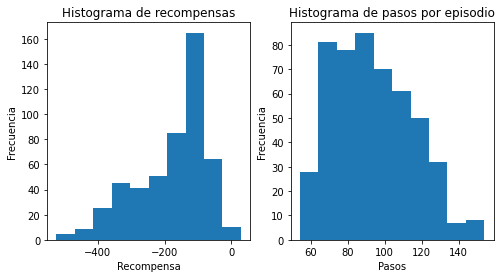

La media de recompensa obtenida es:  -178.9496099467227


In [ ]:
# Lista de recompensas obtenidas en cada episodio.
rewards = []
# Lista de pasos por episodio.
steps = []

# Simulo 500 aterizajes aleatorios.
for _ in range(500):
    env.reset()
    t, total_reward, done = 0, 0, False
    # Juego una partida aleatoria.
    while not done:
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        total_reward += reward
        t += 1
    rewards.append(total_reward)
    steps.append(t)

env.close()

# Genero los dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
# Histograma de recompensas
ax1.hist(rewards, bins=10)
ax1.set_title('Histograma de recompensas')
ax1.set_xlabel('Recompensa')
ax1.set_ylabel('Frecuencia')
# Histograma de pasos por episodio
ax2.hist(steps, bins=10)
ax2.set_title('Histograma de pasos por episodio')
ax2.set_xlabel('Pasos')
ax2.set_ylabel('Frecuencia')
plt.show()
# Media de recompensa obtenida
print('La media de recompensa obtenida es: ', np.mean(rewards))

## 2. Agente de referencia

En la tercera parte de la asignatura hemos introducido el agente DQN con replay buffer y target network, que resulta ser un buen candidato para la solución del problema de robótica que estamos analizando, visto que permite controlar entornos con un número elevado de estados y acciones de forma eficiente.

In [4]:
state = env.reset()

### Ejercicio 2.1 (1.5 puntos)

Implementar un agente DQN para el entorno lunar-lander.

Genero la red.

In [26]:
import torch.nn as nn
class DQN(nn.Module):
    
    def __init__(self, env, learning_rate=1e-3 , shape=64):
        super(DQN, self).__init__()
        """
        Params
        ======
        n_inputs: tamaño del espacio de estados
        n_outputs: tamaño del espacio de acciones
        actions: array de acciones posibles
        device: cpu o cuda
        red: definición de la red neuronal
        """
        #######################################
        ### inicialización y modelo ###
        self.input_shape = 8
        self.shape = shape
        self.n_outputs = env.action_space.n
        self.actions = np.arange(self.n_outputs)
        self.learning_rate = learning_rate
        
        if torch.cuda.is_available():
            self.device = 'cuda'
        else:
            self.device = 'cpu'
        #######################################
        ##Construcción de la red neuronal
        self.red = nn.Sequential(
            nn.Linear(self.input_shape, self.shape),
            nn.ReLU(),
            nn.Linear(self.shape, self.shape),
            nn.ReLU(),
            nn.Linear(self.shape, self.n_outputs)
        )
        if torch.cuda.is_available():
            self.red.cuda()

        #######################################
        ##Inicializar el optimizador
        self.optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)

    ### e-greedy method
    def get_action(self, state, epsilon=0.05):
        if np.random.random() < epsilon:
            action = np.random.choice(self.actions)
        else:
            qvals = self.get_qvals(state)
            action= torch.max(qvals, dim=-1)[1].item()
        return action


    def get_qvals(self, state):
        if type(state) is tuple:
            state = np.array(state)
        state_t = torch.FloatTensor(state).to(device=self.device)
        cnn_out = self.red(state_t)
        return cnn_out


    def feature_size(self):
        return self.red(autograd.Variable(torch.zeros(1, *self.input_shape)).to(device=self.device)).view(1, -1).size(1)

Genero el buffer.

In [27]:
from collections import namedtuple, deque

class experienceReplayBuffer:
    def __init__(self, memory_size=50000, burn_in=10000):
        self.memory_size = memory_size
        self.burn_in = burn_in
        self.buffer = namedtuple('Buffer',
            field_names=['state', 'action', 'reward', 'done', 'next_state'])
        self.replay_memory = deque(maxlen=memory_size)

    def sample_batch(self, batch_size=32):
        samples = np.random.choice(len(self.replay_memory), batch_size,
                                   replace=False)
        # Use el operador asterisco para desempaquetar deque
        batch = zip(*[self.replay_memory[i] for i in samples])
        return batch

    def append(self, state, action, reward, done, next_state):
        self.replay_memory.append(
            self.buffer(state, action, reward, done, next_state))

    def burn_in_capacity(self):
        return len(self.replay_memory) / self.burn_in

Genero el agente.

In [28]:
from copy import deepcopy, copy
class DQNAgent:
    ###################################################
    ######declarar variables ##################
    def __init__(self, env, main_network,
                 buffer, reward_threshold,
                 epsilon=0.1, eps_decay=0.99, batch_size=32, nblock=100):
        """"
        Params
        ======
        env: entorno
        main_network: clase con la red neuronal diseñada
        target_network: red objetivo
        buffer: clase con el buffer de repetición de experiencias
        epsilon: epsilon
        eps_decay: epsilon decay
        batch_size: batch size
        nblock: bloque de los X últimos episodios de los que se calculará la media de recompensa
        reward_threshold: umbral de recompensa
        """

        if torch.cuda.is_available():
            self.device = 'cuda'
        else:
            self.device = 'cpu'
        self.env = env
        self.main_network = main_network
        self.target_network = deepcopy(main_network) # red objetivo (copia de la principal)
        self.buffer = buffer
        self.epsilon = epsilon
        self.eps_decay = eps_decay
        self.batch_size = batch_size
        self.nblock = nblock
        self.reward_threshold = reward_threshold
        self.initialize()


    ###############################################################
    #####inicialitzar variables extra que es necesiten######
    def initialize(self):
        self.sync_eps = []
        self.total_reward = 0
        self.step_count = 0
        incio_juego = self.env.reset()
        self.state0 = incio_juego

        self.update_loss = []
        self.update_loss_mean = []
        self.training_rewards = []
        self.mean_training_rewards = []
        self.epsilon_list = []

        
    #################################################################################
    ######Tomar nueva acción ###############################################
    def take_step(self, eps, mode='train'):
        if mode == 'explore':
            action = self.env.action_space.sample()  # acción aleatoria en el burn-in
        else:
            action = self.main_network.get_action(self.state0, eps)# acción a partir del valor de Q (elección de la acción con mejor Q)
            self.step_count += 1

        #Realización de la acción y obtención del nuevo estado y la recompensa.
        new_state, reward, done, _ = self.env.step(action)
        self.total_reward += reward
        self.buffer.append(self.state0, action, reward, done, new_state) # guardar experiencia en el buffer
        self.state0 = new_state.copy()


        #TODO: resetear entorno 'if done'
        if done:
            self.state0 = self.env.reset()
        return done



    ## Entrenamiento
    def train(self, gamma=0.99, max_episodes=50000,
              batch_size=32,
              dnn_update_frequency=4,
              dnn_sync_frequency=2000, min_episodios=250, min_epsilon = 0.01):
        self.gamma = gamma
        # Rellenamos el buffer con N experiencias aleatorias ()
        print("Filling replay buffer...")
        while self.buffer.burn_in_capacity() < 1:
            self.take_step(self.epsilon, mode='explore')

        episode = 0
        training = True
        print("Training...")
        # maximo = 0
        while training:
            self.state0 = self.env.reset()
            self.total_reward = 0
            gamedone = False
            paso = 0
            while gamedone == False and paso < 1000:
                paso += 1
                # El agente toma una acción
                gamedone = self.take_step(self.epsilon, mode='train')

                #################################################################################
                ###Actualizar red principal según la frecuencia establecida#####
                if self.step_count % dnn_update_frequency == 0:
                    self.update()

                ########################################################################################
                ###Sincronizar red principal y red objetivo según la frecuencia establecida#####
                if self.step_count % dnn_sync_frequency == 0:
                    self.target_network.load_state_dict(self.main_network.state_dict())
                    self.sync_eps.append(episode)

                if gamedone:
                    episode += 1
                    ##################################################################
                    ######## Almacenar epsilon, training rewards i loss#######
                    # Almaceno epsilon
                    self.epsilon_list.append(self.epsilon)
                    # Almaceno training rewards
                    self.training_rewards.append(self.total_reward)
                    # Almaceno loss
                    self.update_loss_mean.append(np.mean(self.update_loss))

                    ##################################################################
                    self.update_loss = []


                    #######################################################################################
                    ###calcular la media de recompensa de los últimos X episodios, y almacenar#####
                    mean_rewards = np.mean(self.training_rewards[-self.nblock:])
                    self.mean_training_rewards.append(mean_rewards)

                    
                    ##################################################################

                    print(f"\rEpisode: {episode} Mean Rewards: {mean_rewards} Epsilon: {self.epsilon}", end="")

                    # Comprobar si se ha llegado al máximo de episodios
                    if episode >= max_episodes:
                        training = False
                        print('\nEpisode limit reached.')
                        break


                    # Termina el juego si la media de recompensas ha llegado al umbral fijado para este juego
                    # y se ha entrenado un mínimo de episodios
                    if mean_rewards >= self.reward_threshold and min_episodios <  episode:
                        training = False
                        print(f'\nEnvironment solved in {episode} episodes!')
                        break

                    #################################################################################
                    ######Actualizar epsilon ########
                    self.epsilon = max(self.epsilon * self.eps_decay, 0.01)


    ####################################
    #####Cálculo de la pérdida ####
    def calculate_loss(self, batch):
        # Separamos las variables de la experiencia y las convertimos a tensores
        states, actions, rewards, dones, next_states = [i for i in batch]
        rewards_vals = torch.FloatTensor(rewards).to(device=self.device)
        actions_vals = torch.LongTensor(np.array(actions)).to(device=self.device).reshape(-1,1)
        dones_t = torch.ByteTensor(dones).to(device=self.device)

        # Obtenemos los valores de Q de la red principal
        qvals = torch.gather(self.main_network.get_qvals(states), 1, actions_vals)
        # Obtenemos los valores de Q de la red objetivo El parametro detach() evita que estos valores actualicen la red objetivo
        qvals_next = torch.max(self.target_network.get_qvals(next_states),
                               dim=-1)[0].detach()
        qvals_next[dones_t] = 0 # 0 en estados terminales

        #################################################################################
        ###Calculamos ecuación de Bellman
        expected_qvals = rewards_vals + self.gamma * qvals_next

        loss = torch.nn.MSELoss()(qvals, expected_qvals.reshape(-1,1))
        return loss


    def update(self):
        self.main_network.optimizer.zero_grad()  # eliminamos cualquier gradiente pasado
        batch = self.buffer.sample_batch(batch_size=self.batch_size) # seleccionamos un conjunto del buffer
        loss = self.calculate_loss(batch)# calculamos la pérdida
        loss.backward() # hacemos la diferencia para obtener los gradientes
        self.main_network.optimizer.step() # aplicamos los gradientes a la red neuronal
        # Guardamos los valores de pérdida
        if self.device == 'cuda':
            self.update_loss.append(loss.detach().cpu().numpy())
        else:
            self.update_loss.append(loss.detach().numpy())

### Ejercicio 2.2 (1 punto)
Entrenar el agente DQN y buscar los valores de los hiperparámetros que obtengan un alto rendimiento del agente. Para ello, es necesario listar los hiperparámetros bajo estudio y presentar las gráficas de las métricas que describen el aprendizaje.

Defino los parámetros base del agente.

In [42]:
# Defino los parámetros estáticos
BATCH_SIZE = 64
MEMORY_SIZE = 8000
EPSILON = 1
EPSILON_MIN = 0.01
BURN_IN = 100
MAX_EPISODES = 500
MIN_EPISODES = 250
DNN_UPD = 4
DNN_SYNC = 500

In [43]:
if 'buffer' in globals():
    del buffer
if 'dqn' in globals():
    del dqn
if 'agent' in globals():
    del agent

Realizo análisis de hiperparámetros para lr, gamma y epsilon decay.

------------------------------------
Entrenando para lr= 0.05
------------------------------------
Filling replay buffer...
Training...
Episode: 500 Mean Rewards: -130.83786399284602 Epsilon: 0.6069859307919768
Episode limit reached.
------------------------------------
Entrenando para lr= 0.005
------------------------------------
Filling replay buffer...
Training...
Episode: 500 Mean Rewards: -57.42875454678551 Epsilon: 0.6069859307919768
Episode limit reached.
------------------------------------
Entrenando para lr= 0.0005
------------------------------------
Filling replay buffer...
Training...
Episode: 500 Mean Rewards: -67.98290273531855 Epsilon: 0.6069859307919768
Episode limit reached.


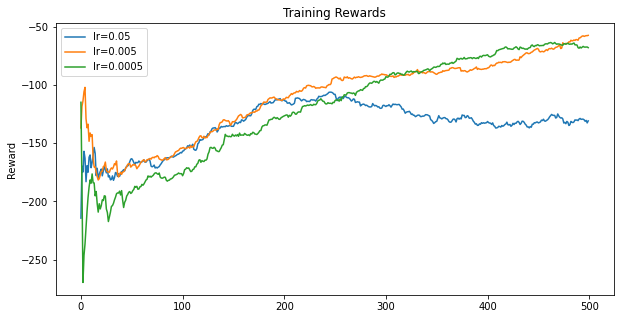

In [44]:
# Defino los parámetros que se probarán
lr_list = [0.05, 0.005, 0.0005]

mean_training_rewards_list = {}
for lr in lr_list:
    print("------------------------------------")
    print("Entrenando para lr=",lr)
    print("------------------------------------")
    # Defino parametros faltantes
    GAMMA = 0.9999
    EPSILON_DECAY = 0.999
    # Defino el buffer
    buffer = experienceReplayBuffer(memory_size=MEMORY_SIZE, burn_in=BURN_IN)
    # Defino la red
    dqn = DQN(env, learning_rate=lr)
    # Defino el agente
    agent = DQNAgent(env, dqn, buffer, 200, EPSILON, EPSILON_DECAY, BATCH_SIZE)
    # Entreno el agente
    agent.train(gamma=GAMMA, max_episodes=MAX_EPISODES,
                batch_size=BATCH_SIZE, 
                dnn_update_frequency=DNN_UPD, 
                dnn_sync_frequency=DNN_SYNC, min_episodios=MIN_EPISODES, 
                min_epsilon = EPSILON_MIN)
    mean_training_rewards_list[lr]= agent.mean_training_rewards
    del buffer, dqn, agent

# Grafico de recompensa media, umbral de recompensa
plt.figure(figsize=(10, 5))
for lr in lr_list:
    plt.plot(mean_training_rewards_list[lr], label='lr='+str(lr))

plt.title('Training Rewards')
plt.ylabel('Reward')
plt.legend(loc="upper left")
plt.show()

------------------------------------
Entrenando para GAMMA= 0.99
------------------------------------
Filling replay buffer...
Training...
Episode: 500 Mean Rewards: -58.325195551822915 Epsilon: 0.6069859307919768
Episode limit reached.
------------------------------------
Entrenando para GAMMA= 0.999
------------------------------------
Filling replay buffer...
Training...
Episode: 500 Mean Rewards: -77.94326109516106 Epsilon: 0.6069859307919768
Episode limit reached.
------------------------------------
Entrenando para GAMMA= 0.9999
------------------------------------
Filling replay buffer...
Training...
Episode: 500 Mean Rewards: -51.56350931289671 Epsilon: 0.6069859307919768
Episode limit reached.


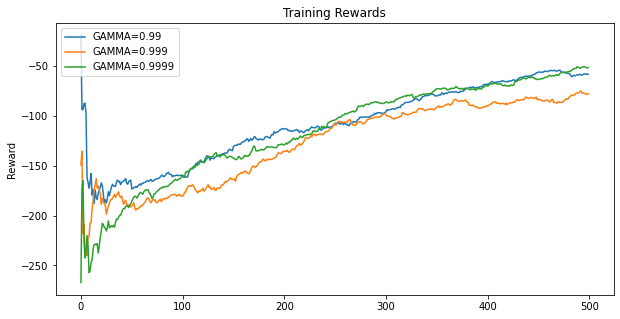

In [45]:
# Defino los parámetros que se probarán
GAMMA_list = [0.99, 0.999, 0.9999]

mean_training_rewards_list = {}
for GAMMA in GAMMA_list:
    print("------------------------------------")
    print("Entrenando para GAMMA=",GAMMA)
    print("------------------------------------")
    # Defino parametros faltantes
    lr = 0.0005
    EPSILON_DECAY = 0.999
    # Defino el buffer
    buffer = experienceReplayBuffer(memory_size=MEMORY_SIZE, burn_in=BURN_IN)
    # Defino la red
    dqn = DQN(env, learning_rate=lr)
    # Defino el agente
    agent = DQNAgent(env, dqn, buffer, 200, EPSILON, EPSILON_DECAY, BATCH_SIZE)
    # Entreno el agente
    agent.train(gamma=GAMMA, max_episodes=MAX_EPISODES,
                batch_size=BATCH_SIZE, 
                dnn_update_frequency=DNN_UPD, 
                dnn_sync_frequency=DNN_SYNC, min_episodios=MIN_EPISODES, 
                min_epsilon = EPSILON_MIN)
    mean_training_rewards_list[GAMMA]= agent.mean_training_rewards
    del buffer, dqn, agent

# Grafico de recompensa media, umbral de recompensa
plt.figure(figsize=(10, 5))
for GAMMA in GAMMA_list:
    plt.plot(mean_training_rewards_list[GAMMA], label='GAMMA='+str(GAMMA))

plt.title('Training Rewards')
plt.ylabel('Reward')
plt.legend(loc="upper left")
plt.show()

------------------------------------
Entrenando para EPSILON_DECAY= 0.99
------------------------------------
Filling replay buffer...
Training...
Episode: 442 Mean Rewards: 200.12065662689446 Epsilon: 0.011888329059788623
Environment solved in 442 episodes!
------------------------------------
Entrenando para EPSILON_DECAY= 0.999
------------------------------------
Filling replay buffer...
Training...
Episode: 500 Mean Rewards: -62.17541728733818 Epsilon: 0.6069859307919768
Episode limit reached.
------------------------------------
Entrenando para EPSILON_DECAY= 0.9999
------------------------------------
Filling replay buffer...
Training...
Episode: 500 Mean Rewards: -152.00731464789172 Epsilon: 0.95132217848943
Episode limit reached.


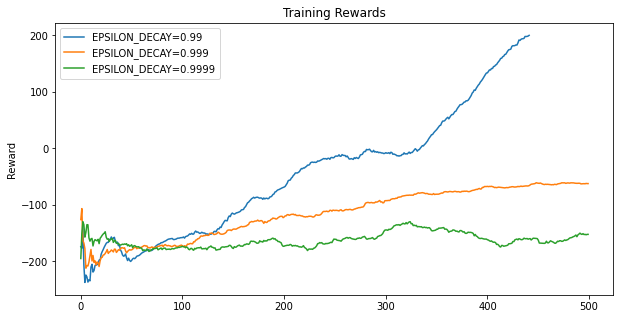

In [46]:
# Defino los parámetros que se probarán
EPSILON_DECAY_list = [0.99, 0.999, 0.9999]

mean_training_rewards_list = {}
for EPSILON_DECAY in EPSILON_DECAY_list:
    print("------------------------------------")
    print("Entrenando para EPSILON_DECAY=",EPSILON_DECAY)
    print("------------------------------------")
    # Defino parametros faltantes
    lr = 0.0005
    GAMMA = 0.9999
    # Defino el buffer
    buffer = experienceReplayBuffer(memory_size=MEMORY_SIZE, burn_in=BURN_IN)
    # Defino la red
    dqn = DQN(env, learning_rate=lr)
    # Defino el agente
    agent = DQNAgent(env, dqn, buffer, 200, EPSILON, EPSILON_DECAY, BATCH_SIZE)
    # Entreno el agente
    agent.train(gamma=GAMMA, max_episodes=MAX_EPISODES,
                batch_size=BATCH_SIZE, 
                dnn_update_frequency=DNN_UPD, 
                dnn_sync_frequency=DNN_SYNC, min_episodios=MIN_EPISODES, 
                min_epsilon = EPSILON_MIN)
    mean_training_rewards_list[EPSILON_DECAY]= agent.mean_training_rewards
    del buffer, dqn, agent

# Grafico de recompensa media, umbral de recompensa
plt.figure(figsize=(10, 5))
for EPSILON_DECAY in EPSILON_DECAY_list:
    plt.plot(mean_training_rewards_list[EPSILON_DECAY], label='EPSILON_DECAY='+str(EPSILON_DECAY))

plt.title('Training Rewards')
plt.ylabel('Reward')
plt.legend(loc="upper left")
plt.show()

Entreno con los mejores hiperparámetros.

In [47]:
# Defino los parámetros
lr = 0.0005
BATCH_SIZE = 64
MEMORY_SIZE = 8000
GAMMA = 0.9999
EPSILON = 1
EPSILON_DECAY = 0.99
EPSILON_MIN = 0.01
BURN_IN = 500
MAX_EPISODES = 2500
MIN_EPISODES = 250
DNN_UPD = 4
DNN_SYNC = 500

if 'buffer' in globals():
    del buffer
if 'dqn' in globals():
    del dqn
if 'agent' in globals():
    del agent
# Defino el buffer
buffer = experienceReplayBuffer(memory_size=MEMORY_SIZE, burn_in=BURN_IN)
# Defino la red
dqn = DQN(env, learning_rate=lr)
# Defino el agente
agent = DQNAgent(env, dqn, buffer, 200, EPSILON, EPSILON_DECAY, BATCH_SIZE)
# Entreno el agente
start_time = time.time()
agent.train(gamma=GAMMA, max_episodes=MAX_EPISODES,
            batch_size=BATCH_SIZE, 
            dnn_update_frequency=DNN_UPD, 
            dnn_sync_frequency=DNN_SYNC, min_episodios=MIN_EPISODES, min_epsilon = EPSILON_MIN)
end_time = time.time()
print("Tiempo de ejecución: {} segundos".format(end_time - start_time))

Filling replay buffer...
Training...
Episode: 443 Mean Rewards: 200.35985851702125 Epsilon: 0.011769445769190737
Environment solved in 443 episodes!
Tiempo de ejecución: 353.9730019569397 segundos


Genero las gráficas del entrenamiento.

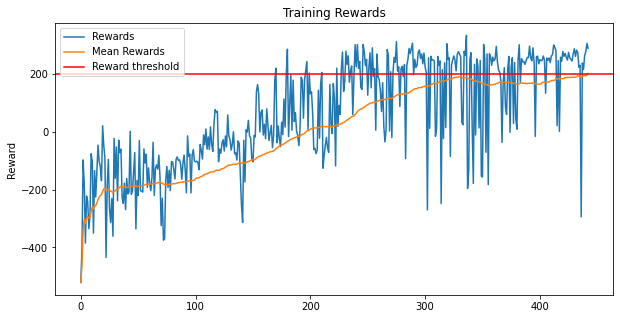

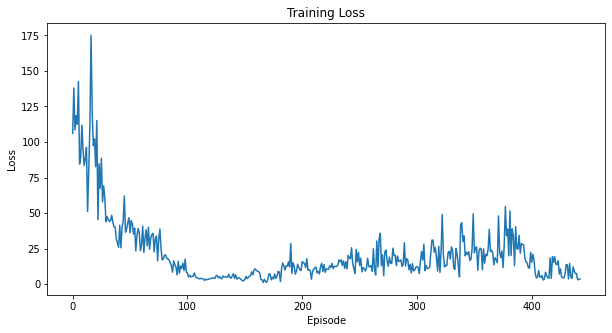

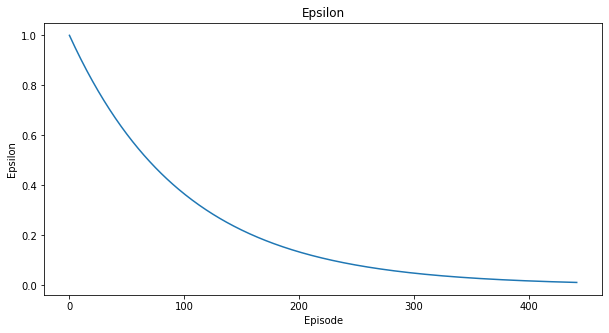

In [48]:
# Grafico de recompensas, recompensa media, umbral de recompensa
plt.figure(figsize=(10, 5))
plt.plot(agent.training_rewards, label='Rewards')
plt.plot(agent.mean_training_rewards, label='Mean Rewards')
plt.axhline(y=200, color='r', label="Reward threshold")
plt.title('Training Rewards')
plt.ylabel('Reward')
plt.legend(loc="upper left")
plt.show()

# Grafico de pérdida
plt.figure(figsize=(10, 5))
plt.plot(agent.update_loss_mean)
plt.title('Training Loss')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.show()

# Grafico de epsilon
plt.figure(figsize=(10, 5))
plt.plot(agent.epsilon_list)
plt.title('Epsilon')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

# Guardo la recompenza media
file = open('agentDQN_mean_training_rewards.txt','w')
for x in agent.mean_training_rewards:
	file.write(str(x)+"\n")
file.close()

Guardo la red entrenada.

In [50]:
# Guardo modelo entrenado
torch.save(agent.main_network.state_dict(), 'agentDQN_Trained_Model.pth')

### Ejercicio 2.3 (0.5 puntos)
Probar el agente entrenado en el entorno de prueba. Visualizar su comportamiento (a través de gráficas de las métricas más oportunas).

Genero ejecuciones con el agente entrenado y realizo histogramas de recompensa.

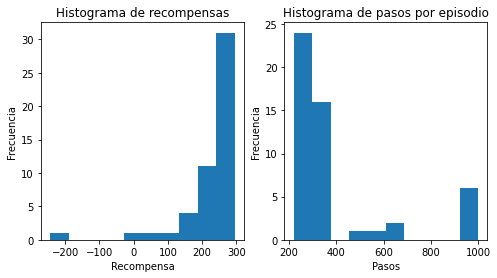

La media de recompensa obtenida es:  224.1607353877566


In [51]:
# Defino los parámetros
lr = 0.0005
BATCH_SIZE = 64
MEMORY_SIZE = 8000
GAMMA = 0.99
EPSILON = 1
EPSILON_DECAY = 0.996
EPSILON_MIN = 0.01
BURN_IN = 100
MAX_EPISODES = 2000
MIN_EPISODES = 250
DNN_UPD = 4
DNN_SYNC = 500

buffer = experienceReplayBuffer(memory_size=MEMORY_SIZE, burn_in=BURN_IN)
dqn1 = DQN(env, learning_rate=lr)
agentDQN = DQNAgent(env, dqn1, buffer, 350)

agentDQN.main_network.load_state_dict(torch.load("agentDQN_Trained_Model.pth"))

# Lista de recompensas obtenidas en cada episodio.
rewards = []
# Lista de pasos por episodio.
steps = []

# Juego 500 partidas.
for _ in range(50):
    t, total_reward, done = 0, 0, False
    state = env.reset()
    while not done:
        action = agentDQN.main_network.get_action(state,epsilon=0.0)
        state, reward, done, info = env.step(action)
        total_reward += reward
        t=t+1
    rewards.append(total_reward)
    steps.append(t)

env.close()

# Genero los dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
# Histograma de recompensas
ax1.hist(rewards, bins=10)
ax1.set_title('Histograma de recompensas')
ax1.set_xlabel('Recompensa')
ax1.set_ylabel('Frecuencia')
# Histograma de pasos por episodio
ax2.hist(steps, bins=10)
ax2.set_title('Histograma de pasos por episodio')
ax2.set_xlabel('Pasos')
ax2.set_ylabel('Frecuencia')
plt.show()
# Media de recompensa obtenida
print('La media de recompensa obtenida es: ', np.mean(rewards))

Genero una instancia del entorno guardando el proceso en un gif.

In [52]:
state = env.reset()

total_reward = 0
done = False
frames = []
state = env.reset()

while not done:
    action = agentDQN.main_network.get_action(state,epsilon=0.0)
    frame = env.render(mode='rgb_array')
    frames.append(_label_with_text(frame, state, action))
    new_state, reward, done, info = env.step(action)

    total_reward += reward
    state = new_state

print(f"Recompensa: {total_reward}.")
make_gif(frames, "agente_DQN.gif")

/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Recompensa: 188.0310376955125.


## 3. Propuesta de mejora

En esta parte se pide implementar otro agente, entre aquellos que hemos visto a lo largo de la asignatura, que pueda solucionar el problema de robótica espacial de forma más eficiente con respecto al agente DQN.

In [73]:
state = env.reset()

### Ejercicio 3.1 (2 puntos)
Implementar el agente identificado en el entorno lunar-lander. Justificar las razones que han llevado a probar este tipo de agente. Detallar qué tipos de problemas se espera se puedan solucionar con respecto a la implementación DQN anterior.

Genero las redes y el agente.

In [75]:
class Actor(nn.Module):
    def __init__(self):
        super(Actor, self).__init__()
        """
        Params
        ======
        n_inputs: tamaño del espacio de estados
        n_outputs: tamaño del espacio de acciones
        actions: array de acciones posibles
        """

        #######################################
        ### inicialización y modelo
        self.input_shape = 8
        self.n_outputs = env.action_space.n
        
        #######################################
        ### Creación de la red
        self.fc1 = nn.Linear(self.input_shape, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, self.n_outputs)

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.softmax(torch.clamp(self.fc3(out), min=-10, max=10), dim=-1)
        return out
    
    def get_action(self, x):
        x = torch.from_numpy(x)
        return torch.multinomial(self(x), 1).detach().numpy()

class Critic(nn.Module):
    def __init__(self):
        super(Critic, self).__init__()
        """
        Params
        ======
        n_inputs: tamaño del espacio de estados
        n_outputs: tamaño del espacio de acciones
        actions: array de acciones posibles
        """

        #######################################
        ### inicialización y modelo
        self.input_shape = 8
        self.n_outputs = env.action_space.n
        
        #######################################
        ### Creación de la red
        self.fc1 = nn.Linear(self.input_shape, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, self.n_outputs)

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out
    

class A2CAgent:
    def __init__(self, env, actor_network, critic_network, reward_threshold,
                 lrActor, lrCritic, gamma, nblock=100):
        """"
        Params
        ======
        env: entorno
        actor_network: red neuronal del actor
        critic_network: red neuronal del actor
        discount_factor:
        entropy_coef: 
        reward_threshold: umbral de recompensa
        """
        self.env = env
        self.actor_network = actor_network
        self.value_network = critic_network
        self.lrActor = lrActor
        self.lrCritic = lrCritic
        self.actor_network_optimizer = optim.RMSprop(self.actor_network.parameters(), lr=self.lrActor)
        self.value_network_optimizer = optim.RMSprop(self.value_network.parameters(), lr=self.lrCritic)
        self.gamma = gamma
        self.nblock = nblock
        self.reward_threshold = reward_threshold

        self.update_loss = []
        self.update_loss_mean = []
        self.training_rewards = []
        self.mean_training_rewards = []
        

    # Ventajas
    def _returns_advantages(self, rewards, dones, values, next_value):
        
        returns = np.append(np.zeros_like(rewards), [next_value], axis=0)
        
        for t in reversed(range(rewards.shape[0])):
            returns[t] = rewards[t] + self.gamma * returns[t + 1] * (1 - dones[t])
            
        returns = returns[:-1]
        advantages = returns - values
        return returns, advantages

    # Entrenamiento
    def train(self, max_episodes, batch_size):

        episode_count = 0
        actions = np.empty((batch_size,), dtype=int)
        dones = np.empty((batch_size,), dtype=bool)
        rewards, values = np.empty((2, batch_size), dtype=float)
        observations = np.empty((batch_size,) + self.env.observation_space.shape, dtype=float)
        observation = self.env.reset()
        rewards_test = []

        training = True
        print("Training...")

        paso = 0
        total_reward = 0
        while training:
            for i in range(batch_size):
                observations[i] = observation
                values[i] = self.value_network(torch.tensor(observation, dtype=torch.float)).detach().numpy()[0]
                policy = self.actor_network(torch.tensor(observation, dtype=torch.float))
                actions[i] = torch.multinomial(policy, 1).detach().numpy()
                observation, rewards[i], dones[i], _ = self.env.step(actions[i])
                paso += 1
                total_reward += rewards[i]

                if dones[i]:
                    observation = self.env.reset()

            # 
            if dones[-1]:
                next_value = 0
            else:
                next_value = self.value_network(torch.tensor(observation, dtype=torch.float)).detach().numpy()[0]
                paso += 1
                if paso > 1000:
                    observation = self.env.reset()
                    paso = 0
            
            # Update episode_count
            temp_episode_count = episode_count
            episode_count += sum(dones)

            # Compute returns and advantages
            returns, advantages = self._returns_advantages(rewards, dones, values, next_value)

            # Learning step !
            loss = self.optimize_model(observations, actions, returns, advantages)
            self.update_loss.append(loss.detach().numpy())

            # Comprobar si se ha llegado al máximo de episodios
            if episode_count >= max_episodes:
                training = False
                print('\nEpisode limit reached.')
                break

            if temp_episode_count != episode_count:
                # Almaceno training rewards
                self.training_rewards.append(total_reward)
                mean_rewards = np.mean(self.training_rewards[-self.nblock:])
                self.mean_training_rewards.append(mean_rewards)
                observation = self.env.reset()
                self.update_loss_mean.append(np.mean(self.update_loss))
                self.update_loss = []
                total_reward = 0
                
                ##################################################################
                print(f"\rEpisode: {episode_count} Mean Rewards: {mean_rewards}",end="")

                # Termina el juego si la media de recompensas ha llegado al umbral fijado para este juego
                # y se ha entrenado un mínimo de episodios
                if mean_rewards >= self.reward_threshold:
                    training = False
                    print(f'\nEnvironment solved in {episode_count} episodes!')
                    break


    def optimize_model(self, observations, actions, returns, advantages):
        actions = F.one_hot(torch.tensor(actions), self.env.action_space.n)
        returns = torch.tensor(returns[:, None], dtype=torch.float)
        advantages = torch.tensor(advantages, dtype=torch.float)
        observations = torch.tensor(observations, dtype=torch.float)

        # MSE for the values
        values = self.value_network(observations)
        value_loss = F.mse_loss(values, returns)
        # Actor & Entropy loss
        policy = self.actor_network(observations)
        action_log_probs = torch.sum(actions * torch.log(policy), dim=1)
        actor_loss = -torch.mean(action_log_probs * advantages)
        # Total loss
        loss = actor_loss + value_loss

        # Backpropagation
        self.actor_network_optimizer.zero_grad()
        self.value_network_optimizer.zero_grad()
        loss.backward()
        self.actor_network_optimizer.step()
        self.value_network_optimizer.step()

        return loss

    def evaluate(self):
        env = self.env
        observation = env.reset()
        observation = torch.tensor(observation, dtype=torch.float)
        reward_episode = 0
        done = False

        while not done:
            policy = self.actor_network(observation)
            action = torch.multinomial(policy, 1)
            observation, reward, done, info = env.step(int(action))
            observation = torch.tensor(observation, dtype=torch.float)
            reward_episode += reward
            
        env.close()
        return reward_episode

### Ejercicio 3.2 (2 puntos)
Entrenar el agente identificado y buscar los valores de los hiperpárametros que obtengan el rendimiento “óptimo” del agente.

Establezco los hiperparámetros base del agente.

In [62]:
MAX_EPISODES = 500

Realizo análisis de hiperparámetros para lr y gamma.

------------------------------------
Entrenando para lr= 0.005
------------------------------------
Training...
Episode: 499 Mean Rewards: -141.33913995899596
Episode limit reached.
------------------------------------
Entrenando para lr= 0.0005
------------------------------------
Training...
Episode: 499 Mean Rewards: -45.558347711140314
Episode limit reached.
------------------------------------
Entrenando para lr= 5e-05
------------------------------------
Training...
Episode: 499 Mean Rewards: -204.56861779838817
Episode limit reached.


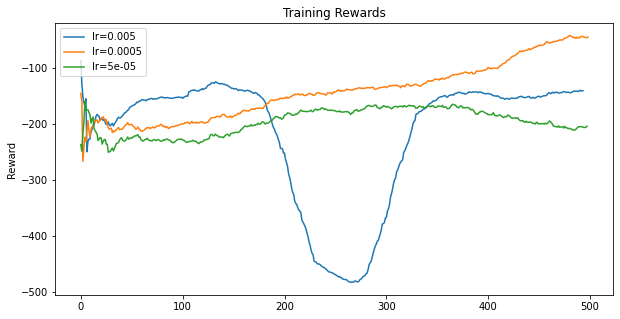

In [63]:
# Defino los parámetros que se probarán
lr_list = [0.005, 0.0005, 0.00005]

mean_training_rewards_list = {}
for lr in lr_list:
    print("------------------------------------")
    print("Entrenando para lr=",lr)
    print("------------------------------------")
    # Defino parametros faltantes
    BATCH_SIZE = 64
    GAMMA = 0.99
    # Crear redes neuronales
    del actor_network, critic_network
    actor_network = Actor()
    critic_network = Critic()
    # Crear agente
    del agent
    agent = A2CAgent(env, actor_network, critic_network, 200, lr, lr, GAMMA)
    # Entreno el agente
    rewards = agent.train(MAX_EPISODES, BATCH_SIZE)
    mean_training_rewards_list[lr]= agent.mean_training_rewards


# Grafico de recompensa media, umbral de recompensa
plt.figure(figsize=(10, 5))
for lr in lr_list:
    plt.plot(mean_training_rewards_list[lr], label='lr='+str(lr))

plt.title('Training Rewards')
plt.ylabel('Reward')
plt.legend(loc="upper left")
plt.show()

------------------------------------
Entrenando para GAMMA= 0.99
------------------------------------
Training...
Episode: 499 Mean Rewards: -5.0997825277467435
Episode limit reached.
------------------------------------
Entrenando para GAMMA= 0.999
------------------------------------
Training...
Episode: 499 Mean Rewards: -21.06257438255202
Episode limit reached.
------------------------------------
Entrenando para GAMMA= 0.9999
------------------------------------
Training...
Episode: 499 Mean Rewards: -793.3264209117046
Episode limit reached.


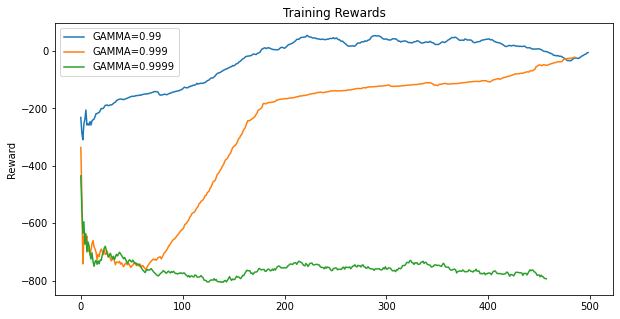

In [64]:
# Defino los parámetros que se probarán
GAMMA_list = [0.99, 0.999, 0.9999]

mean_training_rewards_list = {}
for GAMMA in GAMMA_list:
    print("------------------------------------")
    print("Entrenando para GAMMA=",GAMMA)
    print("------------------------------------")
    # Defino parametros faltantes
    BATCH_SIZE = 64
    lr = 0.005
    # Crear redes neuronales
    del actor_network, critic_network
    actor_network = Actor()
    critic_network = Critic()
    # Crear agente
    del agent
    agent = A2CAgent(env, actor_network, critic_network, 200, lr, lr, GAMMA)
    # Entreno el agente
    rewards = agent.train(MAX_EPISODES, BATCH_SIZE)
    mean_training_rewards_list[GAMMA]= agent.mean_training_rewards


# Grafico de recompensa media, umbral de recompensa
plt.figure(figsize=(10, 5))
for GAMMA in GAMMA_list:
    plt.plot(mean_training_rewards_list[GAMMA], label='GAMMA='+str(GAMMA))

plt.title('Training Rewards')
plt.ylabel('Reward')
plt.legend(loc="upper left")
plt.show()

Entreno con los mejores hiperparámetros.

In [76]:
# Defino los parámetros
lr = 0.0005
BATCH_SIZE = 64
GAMMA = 0.99
MAX_EPISODES = 4000

# Crear redes neuronales
del actor_network, critic_network, agent
actor_network = Actor()
critic_network = Critic()
# Crear agente
agent = A2CAgent(env, actor_network, critic_network, 200, lr, lr, GAMMA)

# Entreno el agente
start_time = time.time()
rewards = agent.train(MAX_EPISODES, BATCH_SIZE)
end_time = time.time()
print("Tiempo de ejecución: {} segundos".format(end_time - start_time))

Training...
Episode: 1695 Mean Rewards: 200.3684797836799
Environment solved in 1695 episodes!
Tiempo de ejecución: 1096.4318821430206 segundos


Genero las gráficas del entrenamiento.

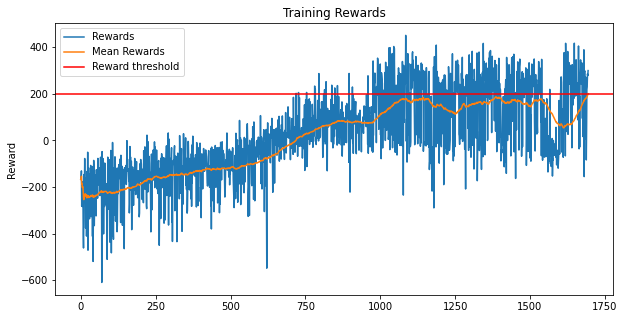

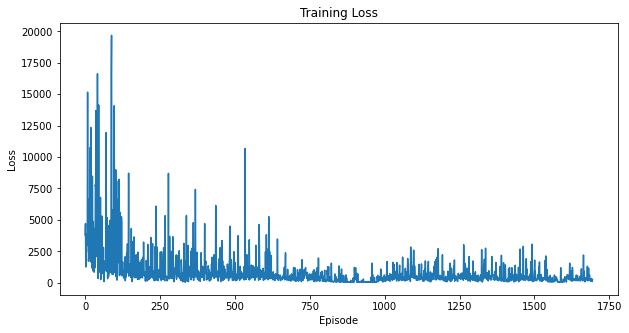

In [77]:
# Grafico de recompensas, recompensa media, umbral de recompensa
plt.figure(figsize=(10, 5))
plt.plot(agent.training_rewards, label='Rewards')
plt.plot(agent.mean_training_rewards, label='Mean Rewards')
plt.axhline(y=200, color='r', label="Reward threshold")
plt.title('Training Rewards')
plt.ylabel('Reward')
plt.legend(loc="upper left")
plt.show()

# Grafico de pérdida
plt.figure(figsize=(10, 5))
plt.plot(agent.update_loss_mean)
plt.title('Training Loss')
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.show()


# Guardo la recompenza media
file = open('agentA2C_mean_training_rewards.txt','w')
for x in agent.mean_training_rewards:
	file.write(str(x)+"\n")
file.close()

Guardo las redes entrenadas.

In [78]:
# Guardo modelo entrenado
torch.save(agent.actor_network.state_dict(), 'agentA2C_Actor_Trained_Model.pth')
torch.save(agent.value_network.state_dict(), 'agentA2C_Critic_Trained_Model.pth')

### Ejercicio 3.3 (2 puntos)
Analizar el comportamiento del agente identificado entrenado en el entorno de prueba y compararlo con el agente implementado en el punto 2 (a través de gráficas de las métricas más oportunas).

Realizo ejecuciones con el agente entrenado y realizo histogramas de recompensa.

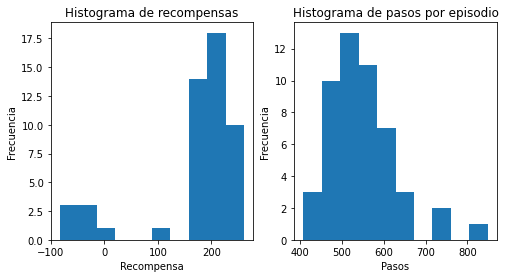

La media de recompensa obtenida es:  169.0022940383969


In [79]:
# Defino los parámetros
lr = 0.0005
BATCH_SIZE = 64
GAMMA = 0.99
MAX_EPISODES = 1000

# Crear redes neuronales
actor_network = Actor()
critic_network = Critic()
# Crear agente
agentA2C = A2CAgent(env, actor_network, critic_network, 200, lr, lr, GAMMA)

agentA2C.actor_network.load_state_dict(torch.load("agentA2C_Actor_Trained_Model.pth"))
agentA2C.value_network.load_state_dict(torch.load("agentA2C_Critic_Trained_Model.pth"))

# Lista de recompensas obtenidas en cada episodio.
rewards = []
# Lista de pasos por episodio.
steps = []

# Juego 50 partidas.
for _ in range(50):
    t, total_reward, done = 0, 0, False
    state = env.reset()
    while not done:
        action = agentA2C.actor_network.get_action(state)[0]
        state, reward, done, info = env.step(action)
        total_reward += reward
        t=t+1
    rewards.append(total_reward)
    steps.append(t)

env.close()

# Genero los dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
# Histograma de recompensas
ax1.hist(rewards, bins=10)
ax1.set_title('Histograma de recompensas')
ax1.set_xlabel('Recompensa')
ax1.set_ylabel('Frecuencia')
# Histograma de pasos por episodio
ax2.hist(steps, bins=10)
ax2.set_title('Histograma de pasos por episodio')
ax2.set_xlabel('Pasos')
ax2.set_ylabel('Frecuencia')
plt.show()
# Media de recompensa obtenida
print('La media de recompensa obtenida es: ', np.mean(rewards))

Genero una instancia del entorno guardando el proceso en un gif.

In [80]:
state = env.reset()

total_reward = 0
done = False
frames = []
state = env.reset()

while not done:
    action = agentA2C.actor_network.get_action(state)[0]
    frame = env.render(mode='rgb_array')
    frames.append(_label_with_text(frame, state, action))
    new_state, reward, done, info = env.step(action)

    total_reward += reward
    state = new_state

print(f"Recompensa: {total_reward}.")
make_gif(frames, "agente_A2C.gif")

Recompensa: 213.46894236268008.
